In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from plotnine import *
import pickle
from yellowbrick.model_selection import FeatureImportances

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/JoaoVitorBoer/Machine-Learning/main/Datasets/dataset3.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
total  = df.groupby(['Outcome']).agg( n = ('Outcome','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [4]:
total

,Outcome,n,perc
0,0,500,65.104167
1,1,268,34.895833


### Outliers

<AxesSubplot:>

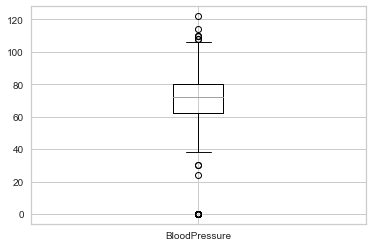

In [5]:
df[['BloodPressure']].boxplot()

### Target e feature

In [6]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

### Separar em treino e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Tratar NaN

Se existir...

In [8]:
df.isna().sum().to_frame()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Tratar variavies numéricas com medidas diferentes

In [9]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='median', missing_values = np.nan),
                                    MinMaxScaler())

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
preprocessor = make_column_transformer(
    (numeric_transformer, ['Pregnancies', 
                           'Glucose', 
                           'BloodPressure', 
                           'SkinThickness', 
                           'Insulin',
                           'BMI', 
                           'DiabetesPedigreeFunction', 
                           'Age']))

In [12]:
LR = make_pipeline(preprocessor,LogisticRegression(solver='lbfgs', max_iter=1000)).fit(X_train, y_train)
LDA = make_pipeline(preprocessor,LinearDiscriminantAnalysis()).fit(X_train, y_train)
CART = make_pipeline(preprocessor,DecisionTreeClassifier()).fit(X_train, y_train)
KNN = make_pipeline(preprocessor,KNeighborsClassifier()).fit(X_train, y_train)
SVM = make_pipeline(preprocessor,SVC(probability=True)).fit(X_train,y_train) 
RF = make_pipeline(preprocessor,RandomForestClassifier()).fit(X_train,y_train) 

# Acuracia do Treino

In [13]:
print("Acurácia treino LR:", LR.score(X_train,y_train), "\n")
print("Acurácia treino LDA:", LDA.score(X_train,y_train), "\n")
print("Acurácia treino CART:", CART.score(X_train,y_train), "\n")
print("Acurácia treino KNN:", KNN.score(X_train,y_train), "\n")
print("Acurácia treino SVM:", SVM.score(X_train,y_train), "\n")
print("Acurácia treino RF:", RF.score(X_train,y_train), "\n")

Acurácia treino LR: 0.7665369649805448 

Acurácia treino LDA: 0.7782101167315175 

Acurácia treino CART: 1.0 

Acurácia treino KNN: 0.8365758754863813 

Acurácia treino SVM: 0.7976653696498055 

Acurácia treino RF: 1.0 



## Confusion Matrix

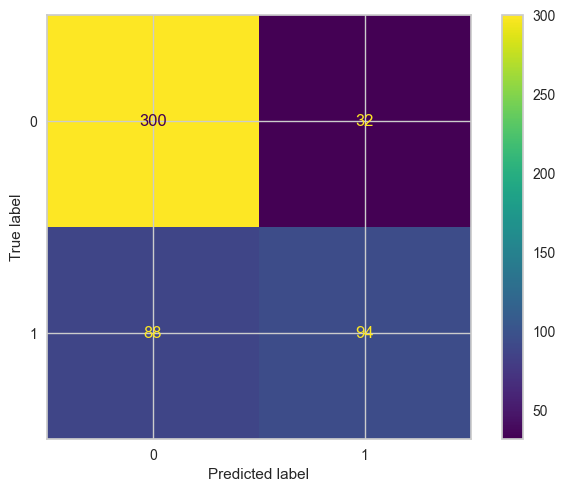

In [14]:
ConfusionMatrixDisplay.from_estimator(LR, X_train,y_train)
plt.show()

## Acuracia, Precision e Recall do Treino

In [15]:
metricas = {'Accuracy':  [LR.score(X_train,y_train),
                          LDA.score(X_train,y_train),
                          CART.score(X_train,y_train),
                          KNN.score(X_train,y_train),
                          SVM.score(X_train,y_train),
                          RF.score(X_train,y_train)],
            'Precision': [precision_score(y_train, LR.predict(X_train), pos_label = 0),
                          precision_score(y_train, LDA.predict(X_train), pos_label = 0),
                          precision_score(y_train, CART.predict(X_train), pos_label = 0),
                          precision_score(y_train, KNN.predict(X_train), pos_label = 0),
                          precision_score(y_train, SVM.predict(X_train), pos_label = 0),
                          precision_score(y_train, RF.predict(X_train), pos_label = 0)],
            'Recall' :   [recall_score(y_train, RF.predict(X_train), pos_label = 0),
                          recall_score(y_train, LDA.predict(X_train), pos_label = 0),
                          recall_score(y_train, CART.predict(X_train), pos_label = 0),
                          recall_score(y_train, KNN.predict(X_train), pos_label = 0),
                          recall_score(y_train, SVM.predict(X_train), pos_label = 0),
                          recall_score(y_train, RF.predict(X_train), pos_label = 0)]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','CART','KNN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.766537,0.773196,1.000000
LDA,0.778210,0.793011,0.888554
CART,1.000000,1.000000,1.000000
KNN,0.836576,0.840659,0.921687
SVM,0.797665,0.808108,0.900602
RF,1.000000,1.000000,1.000000


# Curva ROC

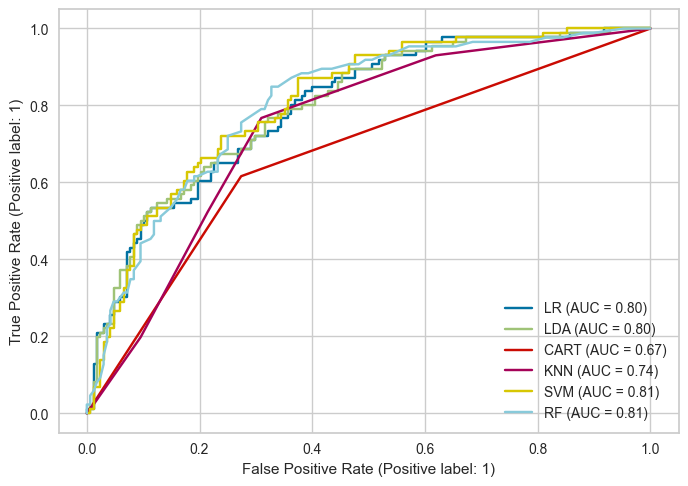

In [16]:
 from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(LR, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'LR')
RocCurveDisplay.from_estimator(LDA, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'LDA')
RocCurveDisplay.from_estimator(CART, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'CART')
RocCurveDisplay.from_estimator(KNN, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'KNN')
RocCurveDisplay.from_estimator(SVM, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'SVM')
RocCurveDisplay.from_estimator(RF, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'RF')

plt.show()

In [18]:
pickle.dump(LR, open('Modelo_Diabete.sav', 'wb'))

In [19]:
loaded_model = pickle.load(open('Modelo_Diabete.sav', 'rb'))

In [20]:
print("Acurácia teste LR:", loaded_model.score(X_test, y_test))
print("Precision teste LR:", precision_score(y_test, loaded_model.predict(X_test)))
print("Recall teste LR:", recall_score(y_test, loaded_model.predict(X_test)))

Acurácia teste LR: 0.7440944881889764
Precision teste LR: 0.647887323943662
Recall teste LR: 0.5348837209302325
